In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'c:\users\prade\downloads\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Text(0.5, 1.0, 'Count by species')

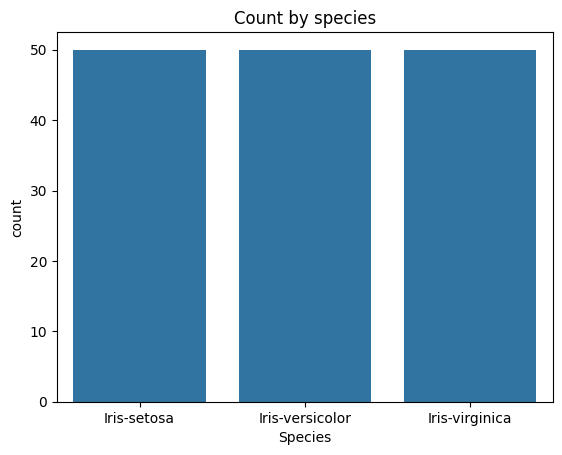

In [4]:
# count by species group

sns.countplot(data=df,x='Species')
plt.title('Count by species')




In [5]:
#train test split 

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Species','Id'],axis=1)
Y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [6]:
from sklearn import tree

dt_classifier = tree.DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=3,min_samples_leaf=5,ccp_alpha=0.01)
dt_classifier.fit(X_train,y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.3333333333333333, 0.875, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = Iris-versicolor'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'PetalLengthCm <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = Iris-versicolor'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = Iris-versicolor'),
 Text(0.6666666666666666, 0.375, 'PetalWidthCm <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = Iris-virginica'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = Iris-versicolor'),
 Text(0.8333333333333334, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = Iris-virginica')]

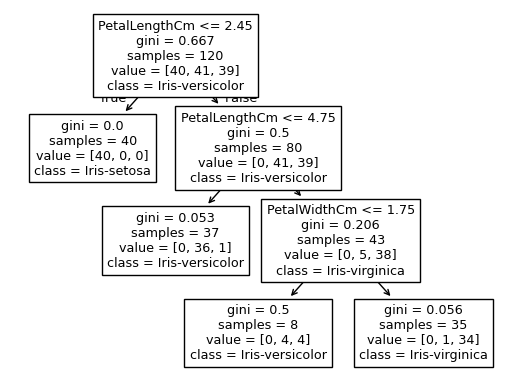

In [7]:
tree.plot_tree(dt_classifier,feature_names=X_train.columns,class_names=df.Species.unique())

In [8]:
y_train_pred = dt_classifier.predict(X_train)

from sklearn.metrics import accuracy_score

accuracySscore = accuracy_score(y_train,y_train_pred)

print('accuracy score ',accuracySscore)


accuracy score  0.95


In [9]:
y_test_pred = dt_classifier.predict(X_test)

accuracySscoreTest = accuracy_score(y_test,y_test_pred)

print('accuracy score ',accuracySscoreTest)


accuracy score  1.0


In [10]:
import numpy as np

# Each row: [sepal length, sepal width, petal length, petal width]
X_test_custom = np.array([
    [5.1, 3.5, 1.4, 0.2],  # likely Setosa
    [4.9, 3.0, 1.4, 0.2],  # likely Setosa

    [6.0, 2.2, 4.0, 1.0],  # likely Versicolor
    [6.2, 2.9, 4.3, 1.3],  # likely Versicolor

    [6.5, 3.0, 5.8, 2.2],  # likely Virginica
    [7.2, 3.6, 6.1, 2.5],  # likely Virginica
])


In [11]:
predictions = dt_classifier.predict(X_test_custom)
print("Predicted classes:", predictions)


Predicted classes: ['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


c:\Users\prade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
